# Pandas
Machine learning e Deep learning utilizam da leitura e manipulação de dados para obtenção de seus fins. O Pandas é uma biblíotéca Open Souce muito utilizada por simplificar a auxiliar no desenpenho dessa manipulação dos dados.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# Leitura dos dados SEM o pandas
X = []
for line in open('dados/data_2d.csv'):
    row = line.split(',')
    sample = [float(x) for x in row]
    X.append(sample)
X = np.array(X)
print(X.shape)

(100, 3)


In [3]:
# Leitura dos dados COM o pandas
X = pd.read_csv('dados/data_2d.csv', header=None) # read_xls() ou read_html()

display(X.info())
display(X.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
0    100 non-null float64
1    100 non-null float64
2    100 non-null float64
dtypes: float64(3)
memory usage: 2.4 KB


None

,0,1,2
0,17.930201,94.520592,320.259530
1,97.144697,69.593282,404.634472
2,81.775901,5.737648,181.485108
3,55.854342,70.325902,321.773638
4,49.366550,75.114040,322.465486


## Data Frames e Series
O modo como o Pandas lida com os dados é transformando eles em Data Frames e Series
- Data frames: Uma estrutura de dados bidimensional - matrix - que é um cojunto de Series
- Series: Uma estrutura de uma única coluna/dimensão - vetor

In [4]:
X = pd.read_csv('dados/data_2d.csv', header=None)

print(type(X))
M = X.values
print(type(M))

X.loc[0],
print(type(X.loc[0]))

display(X[[0,2,1]].head(5))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


,0,2,1
0,17.930201,320.259530,94.520592
1,97.144697,404.634472,69.593282
2,81.775901,181.485108,5.737648
3,55.854342,321.773638,70.325902
4,49.366550,322.465486,75.114040


### Colunas com nomes

In [5]:
df = pd.read_csv('dados/international-airline-passengers.csv',engine='python',skipfooter=3)

display(df.head())

print(df.columns)
df.columns = ["month","passagers"]

display(df.head()) # por padrão exibe as 5 primeiras
display(df.tail()) # por padrão exibe as 5 últimas
display(df.month.head(20).tail())

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Index(['Month', 'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'], dtype='object')


,month,passagers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


,month,passagers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


15    1950-04
16    1950-05
17    1950-06
18    1950-07
19    1950-08
Name: month, dtype: object

In [6]:
df['ones'] = 1
display(df.head())

,month,passagers,ones
0,1949-01,112,1
1,1949-02,118,1
2,1949-03,132,1
3,1949-04,129,1
4,1949-05,121,1


### Função Apply
Ao criar novas colunas muitas vezes elas precisam ser adicionado valores ou aplicados modificações e atraves das função apply podemos fazer essas manipulações
 - ex:  df ['x1x2'] = df.apply(lambda row: row\['x1'\] * row\['x2'\], axis=1)
 - axis 1 para que a funções aplique em cada linhas ao invés de cada coluna

In [7]:
from datetime import datetime
print(datetime.strptime('1949-05','%Y-%m'))

df['dt'] = df.apply(lambda row: datetime.strptime(row['month'],'%Y-%m'),axis=1 )

display(df.head())
print(df.info())

1949-05-01 00:00:00


,month,passagers,ones,dt
0,1949-01,112,1,1949-01-01
1,1949-02,118,1,1949-02-01
2,1949-03,132,1,1949-03-01
3,1949-04,129,1,1949-04-01
4,1949-05,121,1,1949-05-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
month        144 non-null object
passagers    144 non-null int64
ones         144 non-null int64
dt           144 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.6+ KB
None


## Join

In [8]:
t1 = pd.read_csv('dados/table1.csv')
t2 = pd.read_csv('dados/table2.csv')
display(t1,t2)

m = pd.merge(t1,t2,on="user_id")
display(m)

m2 = t1.merge(t2,on='user_id') # ele não altera, apenas cria uma nova a partir daí
display(m2)

,user_id,email,age
0,1,alice@gmail.com,20
1,2,bob@gmail.com,25
2,3,carol@gmail.com,30


,user_id,ad_id,click
0,1,1,1
1,1,2,0
2,1,5,0
3,2,3,0
4,2,4,1
5,2,1,0
6,3,2,0
7,3,1,0
8,3,3,0
9,3,4,0


,user_id,email,age,ad_id,click
0,1,alice@gmail.com,20,1,1
1,1,alice@gmail.com,20,2,0
2,1,alice@gmail.com,20,5,0
3,2,bob@gmail.com,25,3,0
4,2,bob@gmail.com,25,4,1
5,2,bob@gmail.com,25,1,0
6,3,carol@gmail.com,30,2,0
7,3,carol@gmail.com,30,1,0
8,3,carol@gmail.com,30,3,0
9,3,carol@gmail.com,30,4,0


,user_id,email,age,ad_id,click
0,1,alice@gmail.com,20,1,1
1,1,alice@gmail.com,20,2,0
2,1,alice@gmail.com,20,5,0
3,2,bob@gmail.com,25,3,0
4,2,bob@gmail.com,25,4,1
5,2,bob@gmail.com,25,1,0
6,3,carol@gmail.com,30,2,0
7,3,carol@gmail.com,30,1,0
8,3,carol@gmail.com,30,3,0
9,3,carol@gmail.com,30,4,0


In [9]:
df = pd.DataFrame([[1,2],[3,4]])

display(df)
display(df.as_matrix()) # deprecated
display(df.values)

,0,1
0,1,2
1,3,4


/home/borges/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


array([[1, 2],
       [3, 4]])

array([[1, 2],
       [3, 4]])

## Informações, Aritimética e Estatística
A flexibilidade dos Dataframes e Series nos facilitas de coletar informações sobre os dados que possuímos como quantidade de dados, cálculso estatísticos (média, desvio padrão,mínimo, máximo, ...) e tabém de fazer cálculos aritméticos com o numpy 

In [10]:
m = pd.merge(pd.read_csv('dados/table1.csv'),pd.read_csv('dados/table2.csv'),on="user_id")

display(m.index)           # dados da primeira coluna
display(m.std(),m.mean())  # Cálculo do Desvio Padrão e Média
display(m.describe())      # Retorna os principais dados estatísticos

display(m['age'].values ** 2)          # elevando ao quadrado
display(np.log(m['age'].values ** 2))  # calculando o ln de quadrado do dado

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

user_id    0.873863
age        4.369314
ad_id      1.537412
click      0.467099
dtype: float64

user_id     2.181818
age        25.909091
ad_id       2.818182
click       0.272727
dtype: float64

,user_id,age,ad_id,click
count,11.000000,11.000000,11.000000,11.000000
mean,2.181818,25.909091,2.818182,0.272727
std,0.873863,4.369314,1.537412,0.467099
min,1.000000,20.000000,1.000000,0.000000
25%,1.500000,22.500000,1.500000,0.000000
50%,2.000000,25.000000,3.000000,0.000000
75%,3.000000,30.000000,4.000000,0.500000
max,3.000000,30.000000,5.000000,1.000000


array([400, 400, 400, 625, 625, 625, 900, 900, 900, 900, 900])

array([5.99146455, 5.99146455, 5.99146455, 6.43775165, 6.43775165,
       6.43775165, 6.80239476, 6.80239476, 6.80239476, 6.80239476,
       6.80239476])

Para a visualização é possível até escolher por onde será ordenado os dados

In [11]:
display('Padrão',m,'Ordenado pela ad-id',m.sort_values(by="ad_id"))

'Padrão'

,user_id,email,age,ad_id,click
0,1,alice@gmail.com,20,1,1
1,1,alice@gmail.com,20,2,0
2,1,alice@gmail.com,20,5,0
3,2,bob@gmail.com,25,3,0
4,2,bob@gmail.com,25,4,1
5,2,bob@gmail.com,25,1,0
6,3,carol@gmail.com,30,2,0
7,3,carol@gmail.com,30,1,0
8,3,carol@gmail.com,30,3,0
9,3,carol@gmail.com,30,4,0


'Ordenado pela ad-id'

,user_id,email,age,ad_id,click
0,1,alice@gmail.com,20,1,1
5,2,bob@gmail.com,25,1,0
7,3,carol@gmail.com,30,1,0
1,1,alice@gmail.com,20,2,0
6,3,carol@gmail.com,30,2,0
3,2,bob@gmail.com,25,3,0
8,3,carol@gmail.com,30,3,0
4,2,bob@gmail.com,25,4,1
9,3,carol@gmail.com,30,4,0
2,1,alice@gmail.com,20,5,0


## Manipulação


# Plotagem de dados

In [12]:
df = pd.read_csv('dados/data_2d.csv', header=None)
df.columns = ['N1','N2','N3']
display(df.head())

,N1,N2,N3
0,17.930201,94.520592,320.259530
1,97.144697,69.593282,404.634472
2,81.775901,5.737648,181.485108
3,55.854342,70.325902,321.773638
4,49.366550,75.114040,322.465486


### Scatter

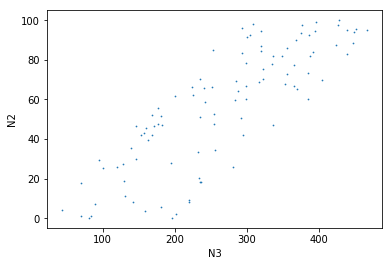

In [13]:

display(df.plot.scatter(x='N3', y='N2', s=.5))

### Hexbin

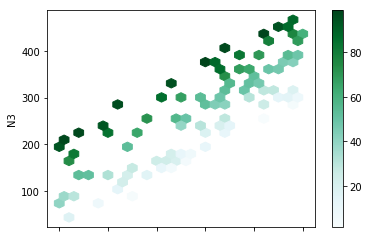

In [14]:

display(df.plot.hexbin(x='N2', y='N3', C='N1', reduce_C_function=np.max, gridsize=25),)

### Pie

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d662cc438>,
      dtype=object)

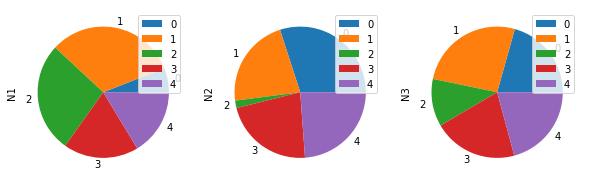

In [15]:

display(df.head().plot.pie(subplots=True, figsize=(10, 5)))

# Referencial
[\[1\] - Seus primeiros passos como Data Scientist: Introdução ao Pandas!](https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-simples-ao-pandas-1e15eea37fa1)

[\[2\] - Deep Learning Prerequisites ](https://www.udemy.com/deep-learning-prerequisites-the-numpy-stack-in-python/learn/lecture/5863150#content)

[\[3\] - Vizualization guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)